## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
df = pd.read_csv('assets/real_estate.csv', sep=';')
df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the most expensive home in the dataset? (★☆☆)

In [31]:
df['price'].max()

8500000

In [30]:
df.price.max()

8500000

In [32]:
df.price.describe()

count    1.533500e+04
mean     4.773036e+05
std      5.912942e+05
min      0.000000e+00
25%      1.690000e+05
50%      2.800000e+05
75%      5.400000e+05
max      8.500000e+06
Name: price, dtype: float64

#### What is cheapest home in the dataset? (★☆☆)

In [26]:
df["price"].min()

0

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [35]:
df["surface"].max() #Biggest home   

249000.0

In [34]:
df["surface"].min() #Smaller home

15.0

#### How many populations (level5) the dataset contains? (★☆☆)

In [39]:
df.info() #15355 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### Does the dataset contain NAs? (★☆☆)


In [13]:
df.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [12]:
df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [22]:
df_arroyo = df[df['level5'] == "Arroyomolinos (Madrid)"]
df_arroyo['price'].mean()

294541.59854014596

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Text(0.5, 1.0, 'Histogram of prices for Arroyomolinos population')

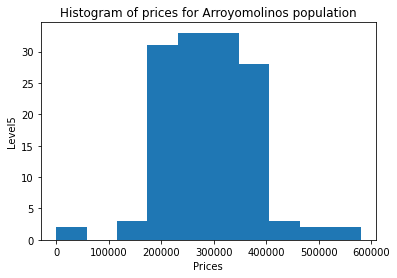

In [32]:
plt.hist(df_arroyo['price'])
plt.xlabel('Prices')
plt.ylabel('Level5')
plt.title('Histogram of prices for Arroyomolinos population')

#La mayoría de las casas de Arroyomolinos salen entre 200.000 y 40.000 dólares

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [37]:
sbelt = df[(df['level5'] == "Fuenlabrada") | (df['level5'] == "Leganés") | (df['level5'] == "Getafe") | (df['level5'] == "Alcorcón")]
sbelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 1 to 15325
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        907 non-null    int64  
 1   id_realEstates    907 non-null    int64  
 2   isNew             907 non-null    bool   
 3   realEstate_name   907 non-null    object 
 4   phone_realEstate  854 non-null    float64
 5   url_inmueble      907 non-null    object 
 6   rooms             902 non-null    float64
 7   bathrooms         897 non-null    float64
 8   surface           787 non-null    float64
 9   price             907 non-null    int64  
 10  date              907 non-null    object 
 11  description       902 non-null    object 
 12  address           907 non-null    object 
 13  country           907 non-null    object 
 14  level1            907 non-null    object 
 15  level2            907 non-null    object 
 16  level3            907 non-null    object 


#### Make a bar plot of the median of prices (★★★) 

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [44]:
variables = sbelt[['level5', 'price', 'rooms', 'surface', 'bathrooms']]
print(variables.mean()) 
print(variables.var())

price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


/tmp/ipykernel_1291/2323207969.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(variables.mean())
/tmp/ipykernel_1291/2323207969.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(variables.var())


#### What is the most expensive home of each population? (★★☆) 

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 